# Forecast using Machine Learning 

A reasonable starting point will be to use any of the tree based algorithms. Random forests Regressor will make for a good start. 

Here we'll also experiment with different algorithms 

In [2]:
import os
import sys
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#local imports

sys.path.append(os.path.abspath(os.path.join('..')))
from src.data.manipulate import Manipulate

%matplotlib inline 
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv('../data/processed/train.csv', index_col='Date')
test_df = pd.read_csv('../data/processed/test.csv', index_col='Date')

## Developing The Model: Define a Performance Metric
I will use the rmspe(Root Mean Square Percentage Error) score provided as an evaluation metric for the competition. You can find the formula inserted in a function down below.If the result is lower then 10% this signifies a very good quality of predicition and would be our goal in this project.

In [4]:
def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean( (y - yhat)**2 ))
    return rmspe

In [5]:
print(train_df.columns.tolist())

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year', 'DayOfYear', 'WeekOfYear']


In [6]:
features = train_df.drop(['Sales'], axis=1)

In [7]:
train, val = train_df.iloc[:int(
    len(train_df)*.8), :], train_df.iloc[int(len(train_df)*.8):, :]

X_train = train.drop(columns=['Sales', 'Customers'])
X_val = val.drop(columns=['Sales', 'Customers'])
y_train = train['Sales'].values
y_val = val['Sales'].values

In [8]:
# pipe = Pipeline([
#     ("model", RandomForestRegressor(n_estimators=100))
# ])

In [8]:
# pipe.fit(train_df)
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [9]:
prediction = regressor.predict(X_val)

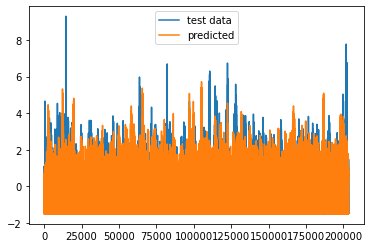

In [10]:
sns.lineplot(x=[*range(len(y_val))], y=y_val)
sns.lineplot(x=[*range(len(prediction))], y= prediction)
plt.legend(['test data', 'predicted'])

In [11]:
regressor.score(X_val, y_val)

0.42917605085403343

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
sqrt_mse = np.sqrt(mean_squared_error(y_val, prediction))
print(f"The Square root of our mean Squared error is: {sqrt_mse}")
r2 = r2_score(y_val, prediction)
print(f"The R2-Score is: {r2}")

The Square root of our mean Squared error is: 0.7300299499196715
The R2-Score is: 0.42917605085403343


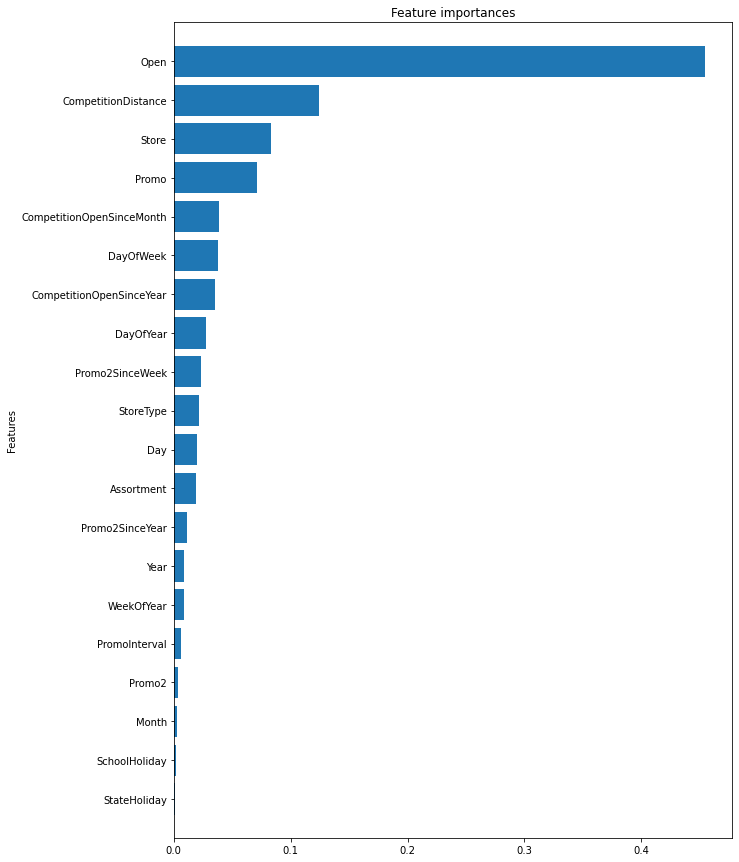

In [37]:
featureImportance = regressor.feature_importances_
std = np.std([regressor.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(featureImportance)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,15))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), featureImportance[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()